In [1]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np

def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encode_sequences(x_train)
x_test = one_hot_encode_sequences(x_test)

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [3]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [43]:
from keras import layers
from keras import models
from keras.optimizers import RMSprop

def build_and_run(epochs=10):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # model.summary()

    model.compile(optimizer=RMSprop(lr=1e-4),
                 loss='binary_crossentropy',
                 metrics=['binary_accuracy'])
    history = model.fit(partial_x_train,
                        partial_y_train,
                        batch_size=16,
                        epochs=epochs,
                        validation_data=(x_val, y_val))
    return model, history

try:
    del model
    del history
except NameError:
    pass
model, history = build_and_run()

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 6s - loss: 0.5566 - binary_accuracy: 0.7727 - val_loss: 0.4223 - val_binary_accuracy: 0.8525
Epoch 2/10
15000/15000 [==============================] - 5s - loss: 0.3397 - binary_accuracy: 0.8822 - val_loss: 0.3147 - val_binary_accuracy: 0.8749
Epoch 3/10
15000/15000 [==============================] - 5s - loss: 0.2587 - binary_accuracy: 0.9059 - val_loss: 0.2824 - val_binary_accuracy: 0.8858
Epoch 4/10
15000/15000 [==============================] - 5s - loss: 0.2227 - binary_accuracy: 0.9178 - val_loss: 0.2729 - val_binary_accuracy: 0.8909
Epoch 5/10
15000/15000 [==============================] - 5s - loss: 0.2005 - binary_accuracy: 0.9256 - val_loss: 0.2709 - val_binary_accuracy: 0.8925
Epoch 6/10
15000/15000 [==============================] - 5s - loss: 0.1843 - binary_accuracy: 0.9309 - val_loss: 0.2761 - val_binary_accuracy: 0.8904
Epoch 7/10
15000/15000 [====================

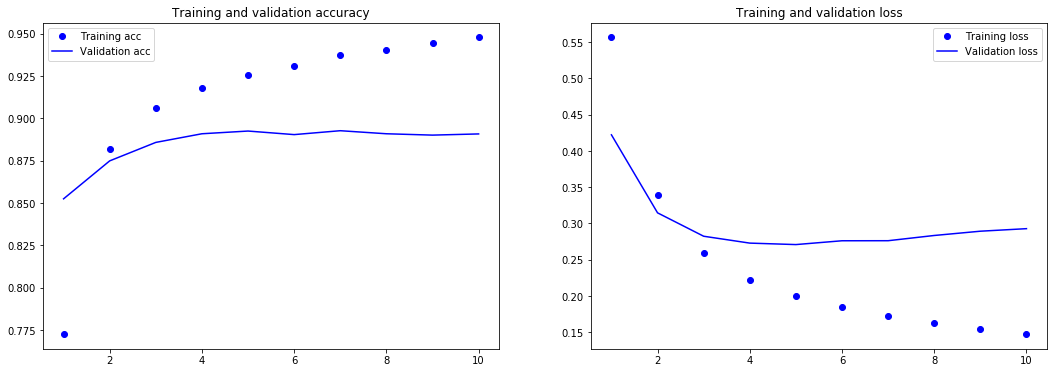

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

f, axarr = plt.subplots(1, 2, figsize=(18, 6))
axarr[0].plot(epochs, acc, 'bo', label='Training acc')
axarr[0].plot(epochs, val_acc, 'b', label='Validation acc')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()

axarr[1].plot(epochs, loss, 'bo', label='Training loss')
axarr[1].plot(epochs, val_loss, 'b', label='Validation loss')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

In [50]:
from keras import layers
from keras import models

optimal_num_epochs = np.argmax(history.history['val_binary_accuracy']) + 1
print('optimal_num_epochs: %s' % optimal_num_epochs)

try:
    del model
except NameError:
    pass
model, history2 = build_and_run(optimal_num_epochs)

optimal_num_epochs: 7
Train on 15000 samples, validate on 10000 samples
Epoch 1/7
15000/15000 [==============================] - 5s - loss: 0.5600 - binary_accuracy: 0.7588 - val_loss: 0.4252 - val_binary_accuracy: 0.8562
Epoch 2/7
15000/15000 [==============================] - 5s - loss: 0.3373 - binary_accuracy: 0.8799 - val_loss: 0.3128 - val_binary_accuracy: 0.8800
Epoch 3/7
15000/15000 [==============================] - 4s - loss: 0.2570 - binary_accuracy: 0.9039 - val_loss: 0.2824 - val_binary_accuracy: 0.8888
Epoch 4/7
15000/15000 [==============================] - 5s - loss: 0.2204 - binary_accuracy: 0.9170 - val_loss: 0.2718 - val_binary_accuracy: 0.8931
Epoch 5/7
15000/15000 [==============================] - 5s - loss: 0.1978 - binary_accuracy: 0.9251 - val_loss: 0.2730 - val_binary_accuracy: 0.8931
Epoch 6/7
15000/15000 [==============================] - 5s - loss: 0.1826 - binary_accuracy: 0.9329 - val_loss: 0.2728 - val_binary_accuracy: 0.8926
Epoch 7/7
15000/15000 [=====

In [51]:
loss, binary_accuracy = model.evaluate(x_test, y_test, batch_size=512)
print('Accuracy: {} %'.format(str(binary_accuracy * 100)))

24064/25000 [===========================>..] - ETA: 0sAccuracy: 88.5999999523 %


In [52]:
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict_classes(x_test).flatten())

24576/25000 [============================>.] - ETA: 0s

In [53]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

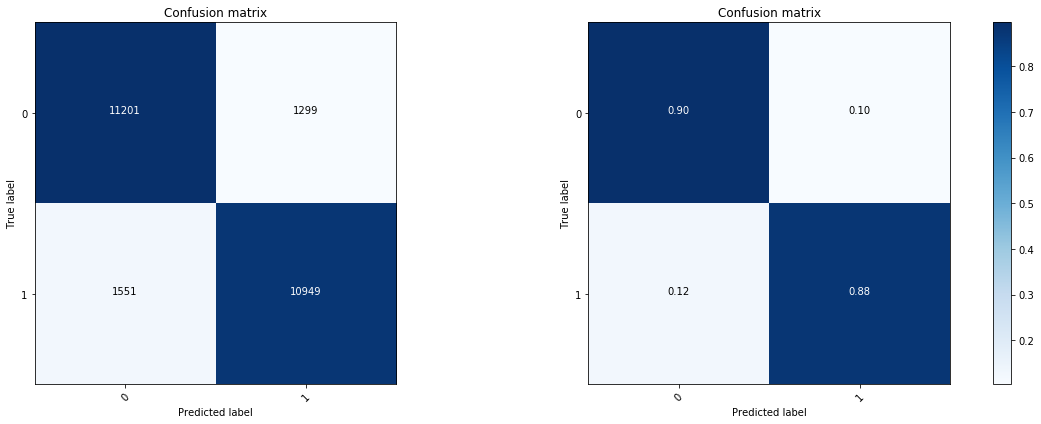

In [54]:
plt.figure(figsize=(20,6))
plt.subplot('121')
plot_confusion_matrix(cm, [0, 1])
plt.subplot('122')
plot_confusion_matrix(cm, [0, 1], normalize=True)